### Importing Required Libraries

In [1]:
import os
from google.colab import files, drive
import zipfile
import json

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
drive.mount('/content/drive')

In [3]:
dir_path = "/content/drive/My Drive/Machine Learning Datasets/"
'''
/content/drive/MyDrive/Machine Learning Datasets/Movie_Recommendation.zip
'''
zipfile_path = dir_path + "/Movie_Recommendation.zip"

In [4]:
if os.path.exists(zipfile_path):
    with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
        zip_ref.extractall(dir_path)
    os.remove(zipfile_path)
dir_path = dir_path + "/Movie_Recommendation"

In [5]:
dir_path

'/content/drive/My Drive/Machine Learning Datasets//Movie_Recommendation'

In [6]:
ratings = pd.read_csv((dir_path + "/ratings.csv"), index_col = 'movieId')
ratings.drop_duplicates(keep = 'first', inplace = True)
ratings.head()

,userId,rating,timestamp
movieId,,,
1,1,4.0,964982703
3,1,4.0,964981247
6,1,4.0,964982224
47,1,5.0,964983815
50,1,5.0,964982931


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92476 entries, 1 to 170875
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     92476 non-null  int64  
 1   rating     92476 non-null  float64
 2   timestamp  92476 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.8 MB


In [8]:
movies = pd.read_csv(dir_path + '/movies.csv', index_col = 'movieId', usecols = ['movieId', 'title', 'genres'])
links = pd.read_csv(dir_path + '/links.csv', index_col = 'movieId', usecols = ['movieId', 'tmdbId'])

movies.drop_duplicates(keep = 'first', inplace = True)
links.drop_duplicates(keep = 'first', inplace = True)

In [9]:
links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9734 entries, 1 to 193609
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmdbId  9733 non-null   float64
dtypes: float64(1)
memory usage: 152.1 KB


In [10]:
links.head()

,tmdbId
movieId,
1,862.0
2,8844.0
3,15602.0
4,31357.0
5,11862.0


In [11]:
links.dropna(inplace = True)

In [12]:
links = links.astype('int')

In [13]:
links.head()

,tmdbId
movieId,
1,862
2,8844
3,15602
4,31357
5,11862


In [14]:
len(links)

9733

In [15]:
len(movies), len(links)

(9742, 9733)

In [16]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [17]:
### Number Of Unique Movies in the Ratings Dataset
len(ratings.index.unique())

9597

In [18]:
# Adding 'TMDB_ID' column to the ratings df based on movieId indices
ratings['tmdbId'] = links.astype('int')

In [19]:
ratings.head(5)

,userId,rating,timestamp,tmdbId
movieId,,,,
1,1,4.0,964982703,862.0
3,1,4.0,964981247,15602.0
6,1,4.0,964982224,949.0
47,1,5.0,964983815,807.0
50,1,5.0,964982931,629.0


In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92476 entries, 1 to 170875
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     92476 non-null  int64  
 1   rating     92476 non-null  float64
 2   timestamp  92476 non-null  int64  
 3   tmdbId     92464 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 5.5 MB


### Note-
    ->  There are 12 ratings, which do not have tmdbId

In [23]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [24]:
movies.loc[(ratings[ratings['tmdbId'].isna()].index.unique().to_list())]

,title,genres
movieId,,
2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
791,"Last Klezmer: Leopold Kozlowski, His Life and ...",Documentary
26587,"Decalogue, The (Dekalog) (1989)",Crime|Drama|Romance
144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
1107,Loser (1991),Comedy
40697,Babylon 5,Sci-Fi
4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi
79299,"No. 1 Ladies' Detective Agency, The (2008)",Comedy|Crime|Mystery
32600,Eros (2004),Drama


In [25]:
len(ratings[ratings['tmdbId'].isna()])

12

In [26]:
# Since there are only 12 ratings for the movies, we don't have tmdbIds for,
# We drop such ratings
ratings.dropna(inplace = True)

In [27]:
len(ratings.index.unique())

9588

In [28]:
# We also update the movies dataframe for only those moves, we have TMDBid for
movies = movies.loc[ratings.index.unique()]

In [29]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
6,Heat (1995),Action|Crime|Thriller
47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9588 entries, 1 to 163981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9588 non-null   object
 1   genres  9588 non-null   object
dtypes: object(2)
memory usage: 224.7+ KB


In [31]:
# Add the tmdbId column to movies dataset
movies['tmdbId'] = links

In [32]:
movies.head()

,title,genres,tmdbId
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,862
3,Grumpier Old Men (1995),Comedy|Romance,15602
6,Heat (1995),Action|Crime|Thriller,949
47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,807
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,629


In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9588 entries, 1 to 163981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9588 non-null   object
 1   genres  9588 non-null   object
 2   tmdbId  9588 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 299.6+ KB


### Save the Updated Datasets raplacing the original ones

In [34]:
movies.to_csv(dir_path + '/movies.csv')

In [35]:
# We have userIds from 1 to 610 as mentioned in the ReadMe
# So, we check for inconsistensy in userIds of the ratings
all(ratings.userId.unique() == (np.arange(610)+1))

True

In [36]:
ratings.head()

,userId,rating,timestamp,tmdbId
movieId,,,,
1,1,4.0,964982703,862.0
3,1,4.0,964981247,15602.0
6,1,4.0,964982224,949.0
47,1,5.0,964983815,807.0
50,1,5.0,964982931,629.0


In [37]:
ratings['tmdbId'] = ratings['tmdbId'].astype('int')

In [38]:
ratings.head()

,userId,rating,timestamp,tmdbId
movieId,,,,
1,1,4.0,964982703,862
3,1,4.0,964981247,15602
6,1,4.0,964982224,949
47,1,5.0,964983815,807
50,1,5.0,964982931,629


In [39]:
((ratings.index.unique().to_list()) == (movies.index.unique().to_list()))

True

In [40]:
ratings.to_csv(dir_path + '/ratings.csv')

### Data Cleanup Done
    -> Now, that different features of the dataset are consistent with each other
    -> We can visualize the distribution, and work on building Recommenders.

### Distribution Of Ratings

In [41]:
def plot_dist(df, col, bins, x_label):
    plt.figure(figsize =(15, 10))
    sns.distplot(df[col], bins = bins, kde = False)
    plt.xlabel(x_label)
    plt.ylabel('Records')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


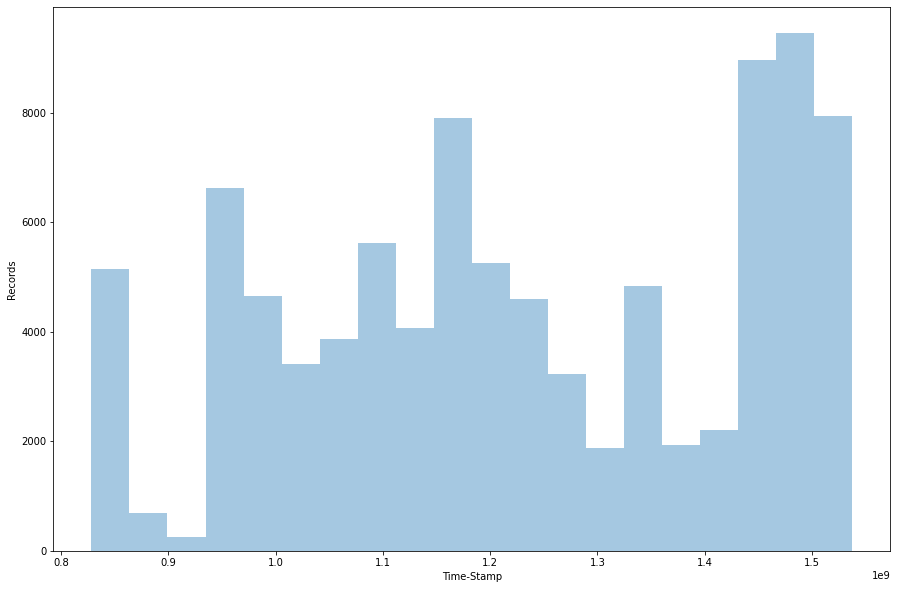

In [42]:
plot_dist(ratings, 'timestamp', bins = 20, x_label = "Time-Stamp")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


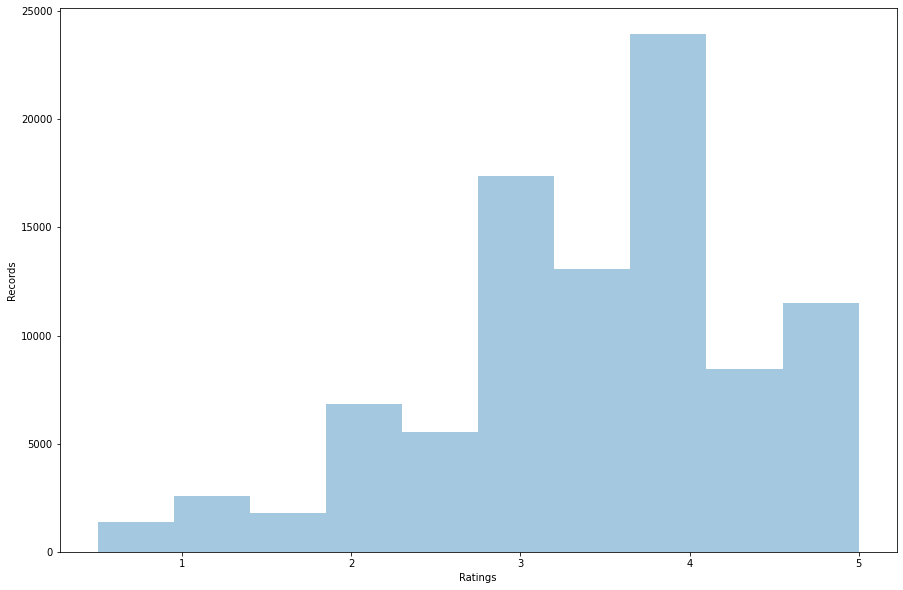

In [43]:
plot_dist(ratings, 'rating', bins = 10, x_label = "Ratings")

In [44]:
len(ratings)

92464

### Preprocessing to minimize memory Usage

In [45]:
# Ratings are discrete values belonging to [0, 5] at intervals of 0.5
# We multiply them with 2 to get integral values such that we can use uint8 datatype 
ratings['rating'] = (ratings['rating'] * 2).astype(np.uint8)

In [46]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92464 entries, 1 to 170875
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   userId     92464 non-null  int64
 1   rating     92464 non-null  uint8
 2   timestamp  92464 non-null  int64
 3   tmdbId     92464 non-null  int64
dtypes: int64(3), uint8(1)
memory usage: 4.9 MB


In [47]:
ratings.to_csv(dir_path + 'ratings.csv')

In [48]:
ratings.head()

,userId,rating,timestamp,tmdbId
movieId,,,,
1,1,8,964982703,862
3,1,8,964981247,15602
6,1,8,964982224,949
47,1,10,964983815,807
50,1,10,964982931,629


In [49]:
# MovieIds are not unique representation of the ratings.
# So, we remove the index col
ratings.reset_index(inplace = True)

In [50]:
len(ratings)

92464

In [51]:
ratings.head()

,movieId,userId,rating,timestamp,tmdbId
0,1,1,8,964982703,862
1,3,1,8,964981247,15602
2,6,1,8,964982224,949
3,47,1,10,964983815,807
4,50,1,10,964982931,629


# User Rating Matrix

In [52]:
URM = (ratings.pivot('userId', 'tmdbId', 'rating'))

In [53]:
URM.head()

tmdbId,2,5,6,11,12,13,14,15,16,18,...,490003,490928,494368,497520,500475,500609,502616,502892,503475,525662
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,10.0,NaN,8.0,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
len(URM.columns)

9588

In [57]:
URM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 9588 entries, 2 to 525662
dtypes: float64(9588)
memory usage: 44.6 MB


### Analysis From User Rating Matrix

In [58]:
# URM Density is the percentage of non-zero/non-null cells or ratings in a User Ratings Matrix
URM_Density = 100.0 - ((URM.isna().sum()).sum() * 1.0 / (URM.shape[0] * URM.shape[1]) * 100.0)
print("URM Density for the given ratings data = ", URM_Density)

URM Density for the given ratings data =  1.5809379210351722


In [59]:
movies.index.shape

(9588,)

In [60]:
URM.shape

(610, 9588)

In [61]:
URM = (URM.fillna(0)).astype(np.uint8)

In [62]:
URM.head()

tmdbId,2,5,6,11,12,13,14,15,16,18,...,490003,490928,494368,497520,500475,500609,502616,502892,503475,525662
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,10,0,8,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,10,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
URM.to_csv(dir_path + '/UserRatingMatrix.csv')

# Item Content Matrix

In [64]:
movies.head()

,title,genres,tmdbId
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,862
3,Grumpier Old Men (1995),Comedy|Romance,15602
6,Heat (1995),Action|Crime|Thriller,949
47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,807
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,629


## Available Features in the Movies Dataset-
    -> Movie Title
    -> Year Of Release Of The Movie
    -> Genres 

#### Retrieve Years From The Movie Title


    The Time at which a movie got released plays a very important role in Recommendation System.
    Maybe more than the Genre of the Movies.
---

    *   We Can Directly Use The Year Of Release For the Movie as a Feature
    *   But it might not contribute well.
    *   But it might not contribute well.
    *   The buckets are illustrated **below**-
        *   1990s
        *   2000-2005
        *   2005-2010 ...













In [65]:
# We use the year bucket as a list, to make it easier for combination with Genre later on.

year_pattern = re.compile(r'(\()(\d\d\d\d)(\))')

def get_year_bucket(x):
    try:
        year_ = int(year_pattern.search(x).group(2))
        if(year_ < 2000):
            return ["1990s"]
        if(year_ < 2005):
            return ["2000 st"]
        if(year_ < 2010):
            return ["2000 end"]
        if(year_ < 2015):
            return ["2010 st"]
        return ["latest"]

    except:
        return []

In [66]:
movies['Year_bucket'] = movies['title'].apply(get_year_bucket)

In [67]:
movies.head()

,title,genres,tmdbId,Year_bucket
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,862,[1990s]
3,Grumpier Old Men (1995),Comedy|Romance,15602,[1990s]
6,Heat (1995),Action|Crime|Thriller,949,[1990s]
47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,807,[1990s]
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,629,[1990s]


In [68]:
movies.tail()

,title,genres,tmdbId,Year_bucket
movieId,,,,
160341,Bloodmoon (1997),Action|Thriller,30948,[1990s]
160527,Sympathy for the Underdog (1971),Action|Crime|Drama,90351,[1990s]
160836,Hazard (2005),Action|Drama|Thriller,70193,[2000 end]
163937,Blair Witch (2016),Horror|Thriller,351211,[latest]
163981,31 (2016),Horror,284564,[latest]


    -> You can observe, that the Values in Year_Bucket column is in form of list.
    -> I've intentionally prepared it in such format.
    -> It makes it easier to combine it with the Genres of the movies.

In [69]:
movies['MovieFeatures'] = (movies.genres.apply(lambda x: x.split('|'))) + movies.Year_bucket
movies.drop(columns = ['genres', 'Year_bucket'], inplace = True)

In [70]:
movies.head()

,title,tmdbId,MovieFeatures
movieId,,,
1,Toy Story (1995),862,"[Adventure, Animation, Children, Comedy, Fanta..."
3,Grumpier Old Men (1995),15602,"[Comedy, Romance, 1990s]"
6,Heat (1995),949,"[Action, Crime, Thriller, 1990s]"
47,Seven (a.k.a. Se7en) (1995),807,"[Mystery, Thriller, 1990s]"
50,"Usual Suspects, The (1995)",629,"[Crime, Mystery, Thriller, 1990s]"


In [71]:
movies = movies.reset_index().set_index('tmdbId')

In [72]:
len(movies)

9588

In [73]:
ICM = pd.DataFrame(index = movies.index)

In [ ]:
all(ICM.index == movies.index)

True

In [74]:
for idx in movies.index:
    ICM.loc[idx, movies.MovieFeatures.loc[idx]] = 1

In [75]:
ICM.head()

,Adventure,Animation,Children,Comedy,Fantasy,1990s,Romance,Action,Crime,Thriller,...,Sci-Fi,Musical,2000 st,2000 end,IMAX,2010 st,Documentary,latest,Film-Noir,(no genres listed)
tmdbId,,,,,,,,,,,,,,,,,,,,,
862,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15602,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
949,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
ICM.sort_index(inplace = True)
ICM = (ICM.fillna(0)).astype(np.int8)

In [77]:
ICM.head()

,Adventure,Animation,Children,Comedy,Fantasy,1990s,Romance,Action,Crime,Thriller,...,Sci-Fi,Musical,2000 st,2000 end,IMAX,2010 st,Documentary,latest,Film-Noir,(no genres listed)
tmdbId,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
12,1,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
ICM.drop(columns = ['(no genres listed)'], inplace = True)

### Analysis From Item Content Matrix

In [79]:
movies_by_genre = ICM.sum(axis =0).sort_values(ascending = False)
movies_by_year = movies_by_genre.loc[['1990s', '2000 st', '2000 end', '2010 st', 'latest']]
movies_by_genre = movies_by_genre.drop(index = ['1990s', '2000 st', '2000 end', '2010 st', 'latest'])

Text(0.5, 1.0, 'Movies Count For Different Genre')

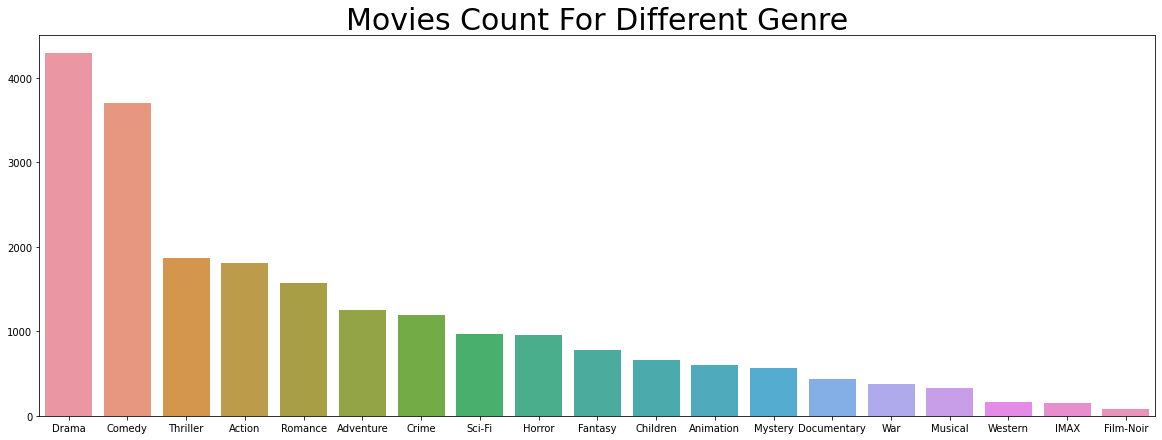

In [80]:
plt.figure(figsize = (20, 7))
sns.barplot(x = movies_by_genre.index, y = movies_by_genre)
plt.title('Movies Count For Different Genre', fontdict = {'fontsize' : 30})

Text(0.5, 1.0, 'Movies Count For Different Release Years')

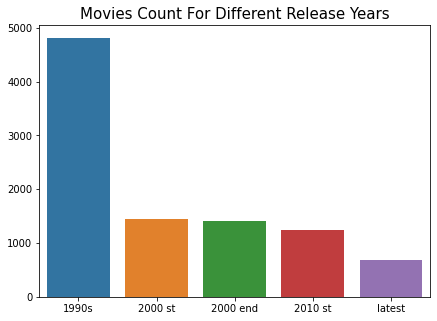

In [81]:
plt.figure(figsize = (7, 5))
sns.barplot(x = movies_by_year.index, y = movies_by_year)
plt.title('Movies Count For Different Release Years', fontdict = {'fontsize' : 15})

In [82]:
ICM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9588 entries, 2 to 525662
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Adventure    9588 non-null   int8 
 1   Animation    9588 non-null   int8 
 2   Children     9588 non-null   int8 
 3   Comedy       9588 non-null   int8 
 4   Fantasy      9588 non-null   int8 
 5   1990s        9588 non-null   int8 
 6   Romance      9588 non-null   int8 
 7   Action       9588 non-null   int8 
 8   Crime        9588 non-null   int8 
 9   Thriller     9588 non-null   int8 
 10  Mystery      9588 non-null   int8 
 11  Horror       9588 non-null   int8 
 12  Drama        9588 non-null   int8 
 13  War          9588 non-null   int8 
 14  Western      9588 non-null   int8 
 15  Sci-Fi       9588 non-null   int8 
 16  Musical      9588 non-null   int8 
 17  2000 st      9588 non-null   int8 
 18  2000 end     9588 non-null   int8 
 19  IMAX         9588 non-null   int8 
 20  2010 s

In [83]:
ICM.head()

,Adventure,Animation,Children,Comedy,Fantasy,1990s,Romance,Action,Crime,Thriller,...,Western,Sci-Fi,Musical,2000 st,2000 end,IMAX,2010 st,Documentary,latest,Film-Noir
tmdbId,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
12,1,1,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
ICM.to_csv(dir_path + '/ItemContentMatrix.csv')

<center> END </center>